<a href="https://colab.research.google.com/github/JayaDubey/MLnow_2.0/blob/main/Univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

`Univariate Linear Regression`

Objective: To compare the first exam and final exam grades of students

**Date Created**: 9 June 2021


**Author**:
 Jaya Dubey

**Reach out**:
[GitHub](https://github.com/JayaDubey) | [LinkedIn](https://www.linkedin.com/in/jaya-dubey-1196b5165/) |  [[Course Repository](https://github.com/JayaDubey/MLnow_2.0)]

[Link to Download the dataset](https://archive.ics.uci.edu/ml/datasets/Student+Performance)

## Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd '/content/drive/MyDrive/Unvariate/archive'

/content/drive/MyDrive/Unvariate/archive


In [ ]:
ls

covid_19_data.csv                      time_series_covid_19_deaths.csv
inc_occ_gender.csv                     time_series_covid_19_deaths_US.csv
student-por.csv                        time_series_covid_19_recovered.csv
time_series_covid_19_confirmed.csv     univariate_CovidData_2.csv
time_series_covid_19_confirmed_US.csv


In [ ]:
import os

In [ ]:
import pandas as pd #working with csv or excel files
import numpy as np #working with numbers/ arrays/ tensors
import tensorflow as tf #framework
from tensorflow import keras #API / library 
import os #using os commands between the python language

In [ ]:
gradeData = pd.read_csv('student-por.csv', sep=';') #load the csv file as dataframe

In [ ]:
gradeData.head(10) #print the first ten rows of the dataframe

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,5,1,1,1,5,0,12,12,13


We are just going to consider the columns `G1` and `G3` for univariate linear regression

$G3_i = G1_i  \cdot \theta_1 + \theta_0$

In [ ]:
uniGradeData = gradeData[['G1', 'G3']];
uniGradeData.head(5)

,G1,G3
0,0,11
1,9,11
2,12,12
3,14,14
4,11,13


In [ ]:
uniGradeData.to_csv('univariate_StudentGradeData_2.csv')

In [ ]:
ls

covid_19_data.csv                      time_series_covid_19_deaths.csv
inc_occ_gender.csv                     time_series_covid_19_deaths_US.csv
student-por.csv                        time_series_covid_19_recovered.csv
time_series_covid_19_confirmed.csv     univariate_CovidData_2.csv
time_series_covid_19_confirmed_US.csv  univariate_StudentGradeData_2.csv


## Data visualization

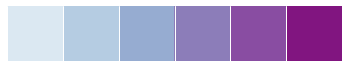

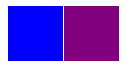

In [ ]:
import seaborn as sns
sns.palplot(sns.color_palette('BuPu')) #Blue to purple colors
pal = sns.color_palette('BuPu', 10) #print 6 color shades from Blue to purple
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#0000FF', '#800080'] #Blue Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [ ]:
uniGradeData.columns #columns in the dataframe

Index(['G1', 'G3'], dtype='object')

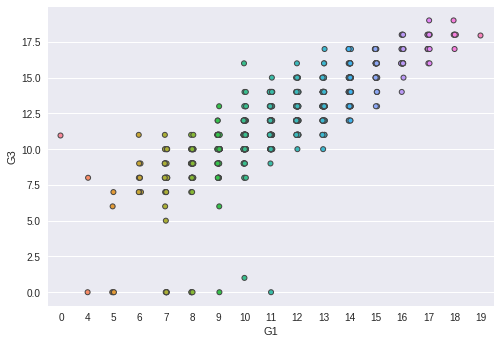

In [ ]:
ax = sns.stripplot(x="G1", y="G3",data=uniGradeData, jitter = 0.05, linewidth=1)

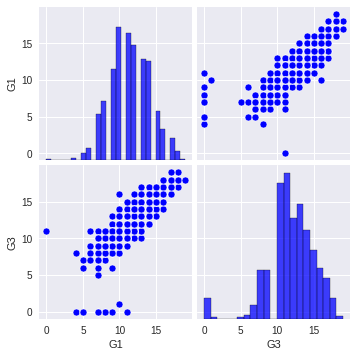

In [ ]:
#pairplot for all the values

sns.pairplot(uniGradeData,
             x_vars = ['G1', 'G3'],
             y_vars =  ['G1', 'G3'],
       diag_kind='hist'
             )

## Data Splits

In [ ]:
#80-20 train-test percent split

trainDataset = uniGradeData.sample(frac=0.8, random_state=0) 
testDataset = uniGradeData.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     G1  G3
532   9   8
375  14  15
306  15  16
625  10  10
480   9  10
    G1  G3
9   12  13
11  10  13
19  12  12
23  10  10
25  10  12


In [ ]:
print(trainDataset.shape)
print(testDataset.shape)

(519, 2)
(130, 2)


In [ ]:
#copy the trainDataset dataframe for getting the features

trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     G1  G3
532   9   8
375  14  15
306  15  16
625  10  10
480   9  10
    G1  G3
9   12  13
11  10  13
19  12  12
23  10  10
25  10  12


In [ ]:
#removing the G3 column and saving it into the labels variable

trainLabels = trainFeatures.pop('G3')
testLabels = testFeatures.pop('G3')

print(trainLabels.head())
print(testLabels.head())

532     8
375    15
306    16
625    10
480    10
Name: G3, dtype: int64
9     13
11    13
19    12
23    10
25    12
Name: G3, dtype: int64


In [ ]:
print(trainFeatures.head())
print(testFeatures.head())

     G1
532   9
375  14
306  15
625  10
480   9
    G1
9   12
11  10
19  12
23  10
25  10


In [ ]:
# univariate -> num(features) = 1
# multvariate -> num(features) > 1 = 11


model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)

])

In [ ]:
model.compile(
    loss = 'mean_absolute_error', #minimizing the MAE loss
    optimizer = tf.keras.optimizers.Adam(0.001), #learning rate specified as 0.001
    # optimizer = 'adam', #takes the default learning rate
    metrics = ['mae', 'mse'] #meanSquare and meanAbsolute error metrics
)

In [ ]:
numEpochs = 5
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Epoch 1/5
17/17 [==============================] - 1s 14ms/step - loss: 7.7004 - mae: 7.7004 - mse: 63.3838 - val_loss: 7.7217 - val_mae: 7.7217 - val_mse: 62.9454
Epoch 2/5
17/17 [==============================] - 0s 3ms/step - loss: 7.4981 - mae: 7.4981 - mse: 60.0722 - val_loss: 7.5114 - val_mae: 7.5114 - val_mse: 59.5970
Epoch 3/5
17/17 [==============================] - 0s 4ms/step - loss: 7.2965 - mae: 7.2965 - mse: 56.9130 - val_loss: 7.3003 - val_mae: 7.3003 - val_mse: 56.3298
Epoch 4/5
17/17 [==============================] - 0s 3ms/step - loss: 7.0940 - mae: 7.0940 - mse: 53.8044 - val_loss: 7.0907 - val_mae: 7.0907 - val_mse: 53.1817
Epoch 5/5
17/17 [==============================] - 0s 3ms/step - loss: 6.8930 - mae: 6.8930 - mse: 50.7961 - val_loss: 6.8791 - val_mae: 6.8791 - val_mse: 50.1001


In [ ]:
print(history)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


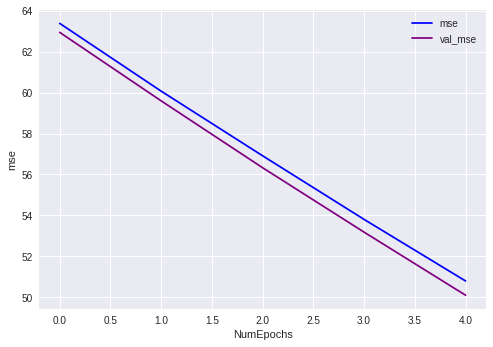

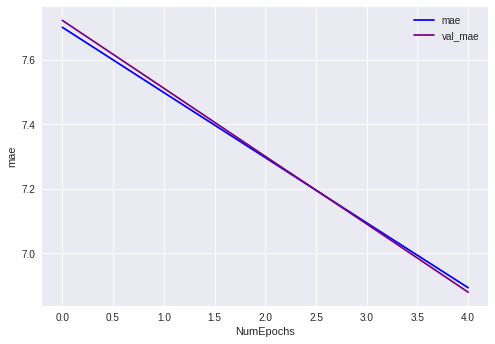

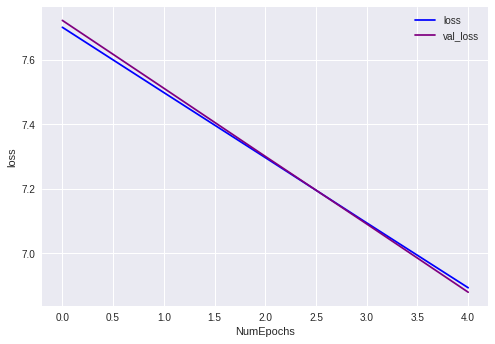

In [ ]:
# tempString = 'mse'
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [ ]:
model.predict([1])

array([[0.53992146]], dtype=float32)

In [ ]:
# testPreds = model.predict(testFeatures).flatten() #array of all prediction values

#for single values

print(f'Prediction for input value 1: {model.predict([1])}')


# for a list of values
tempListforPreds = [1,2,3,4,5]
print(f'''

input List = {tempListforPreds}


List of Predictions:
{model.predict(tempListforPreds)}

List of Predictions (flattened out):
{model.predict(tempListforPreds).flatten()}
''')

Prediction for input value 1: [[0.53992146]]


input List = [1, 2, 3, 4, 5]


List of Predictions:
[[0.53992146]
 [0.99476767]
 [1.4496139 ]
 [1.9044601 ]
 [2.3593063 ]]

List of Predictions (flattened out):
[0.53992146 0.99476767 1.4496139  1.9044601  2.3593063 ]



In [ ]:
print(testFeatures)

     G1
9    12
11   10
19   12
23   10
25   10
..   ..
619  13
627   9
629   7
633  13
639   5

[130 rows x 1 columns]


In [ ]:
testPreds = model.predict(testFeatures).flatten() #array of all prediction values

In [ ]:
print(len(testPreds))
print(testPreds)

130
[5.54323   4.6335373 5.54323   4.6335373 4.6335373 5.54323   5.998076
 6.4529223 4.6335373 6.4529223 4.1786914 7.817461  5.998076  6.9077682
 6.4529223 5.998076  5.998076  5.0883837 5.54323   5.998076  5.998076
 6.9077682 6.4529223 5.0883837 5.998076  5.54323   5.54323   5.998076
 7.3626146 6.4529223 5.54323   6.4529223 4.6335373 4.6335373 5.998076
 5.54323   5.998076  3.723845  4.1786914 6.9077682 5.54323   4.1786914
 3.723845  4.1786914 4.1786914 5.54323   7.3626146 4.1786914 4.6335373
 6.4529223 5.998076  4.1786914 6.4529223 5.998076  5.54323   6.4529223
 4.1786914 3.2689989 4.6335373 5.54323   6.9077682 6.4529223 5.0883837
 5.54323   5.0883837 4.6335373 5.54323   5.54323   5.0883837 5.0883837
 7.3626146 3.723845  5.0883837 7.3626146 5.998076  4.6335373 4.6335373
 5.54323   7.817461  6.9077682 3.723845  3.723845  4.6335373 5.0883837
 5.998076  5.0883837 6.9077682 4.6335373 7.3626146 5.0883837 5.998076
 5.54323   4.6335373 4.6335373 4.6335373 5.54323   4.1786914 7.3626146
 6.9077

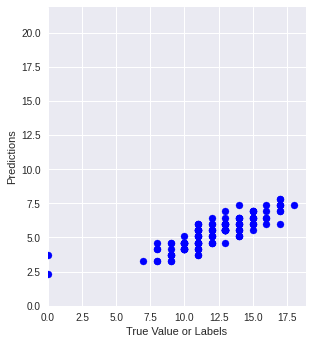

In [ ]:
# prediciton plot --> how well is your model predicting across the actual labels

def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(testLabels, testPreds)

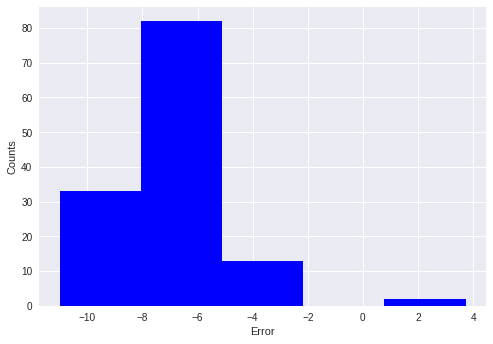

In [ ]:
#error plot --> gaussian distribution 

def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)

Note: 


Validation loss `val_loss` is a metric that tells you how much deviation from the actual label can you expect in the predicted label

To optimize your predicitons -->

- Hyperparameter tuning --> `numEpochs`, `optimizer`, `learning_rate`, lossFunctions